# Machine Learning and Statistic Project 2020
## Renewable Energy Sources - Prediction of Wind Turbine Power Production

* Student Name: **Maciej Burel**
* Student ID: G00376332
* Lecturer: Dr. Ian McLoughlin

***

<p align="center"> <img width="500" height="400" src="Images/w2.jpg" alt="root" /> </p>
(Image - Wharton, 2015)

##  Table of Contents<a id="table"/>
***

* [Goals and objectives](#goals)
* [Introduction](#introduction)
* [](#task2)
* [](#task3)
* [ ](#task4)
* [References](#references)

## Goals and objectives<a id="goals"/>
***

* The goal of this project is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set powerproduction.csv.
* The part of the project is to create a web service that will respond with predicted power values based on speed values sent as HTTP requests.
* Research and investigations about wind energy production 
* Solution and approaching for project task
* Implementation and presentation of the project results 
* Final project should contain following elements:
    * Jupyter notebook that trains a model using the data set. In the notebook, it should be explained the model and an analysis of its accuracy.
    * Python script that runs a web service based on the model, as above.
    * Dockerfile to build and run the web service in a container.

## Introduction<a id="introduction"/>
***

### Wind energy production

The need to move towards renewable and clean energy sources has increased considerably over the previous years.
As the demand for wind power has increased over the last decades, there is a serious need to set up wind farms and construct facilities depending on accurate wind forecasted data. Collected short-term wind forecasting has a significant effect on the electricity [1], which is also necessary to identify the size of wind farms.

It is obvious that there is a need for an accurate wind forecasting technique to substantially reduce the cost by wind power scheduling [2]. 

### How Do Wind Turbines Work?

Wind turbine blades rotate when hit by the wind. And this doesn’t have to be a strong wind, either: the blades of most turbines will start turning at a wind speed of 3-5 meters per second, which is a gentle breeze.  

It’s this spinning motion that turns a shaft in the nacelle – which is the box-like structure at the top of a wind turbine. A generator built into the nacelle then converts the kinetic energy of the turning shaft into electrical energy. This then passes through a transformer, which steps up the voltage so it can be transported on the National Grid or used by a local site.

<p align="center"> <img width="500" height="400" src="Images/w3.jpg" alt="root" /> </p>
(Image - Futuren, 2019)

Most onshore wind turbines have a capacity of 2-3 megawatts (MW), which can produce over 6 million kilowatt hours (kwh) of electricity every year. That’s enough to meet the electricity demand of around 1,500 average households.

Up to a certain level, the faster the wind blows, the more electricity is generated. In fact, when the wind speed doubles, up to eight times more electricity is generated. But if the wind is too strong, turbines will shut themselves down to prevent being damaged.

A wind turbine is typically 30-45% efficient – rising to 50% efficient at times of peak wind. If that sounds low to you, remember that if turbines were 100% efficient, the wind would completely drop after going through the turbine.[3]

### Wind Power Calculation

Wind energy is the kinetic energy of air in motion, also called wind. Total wind energy flowing through an imaginary surface with area A during the time t is:

$$E = \frac{1}{2}mv^2 = \frac{1}{2}(Avt\rho)v^2 = \frac{1}{2}At\rho v^3$$

where ρ is the density of air; v is the wind speed; Avt is the volume of air passing through A (which is considered perpendicular to the direction of the wind); Avtρ is therefore the mass m passing through "A". ½ ρv2 is the kinetic energy of the moving air per unit volume.

Power is energy per unit time, so the wind power incident on A (e.g. equal to the rotor area of a wind turbine) is [4] :

$$P = \frac{E}{t} = \frac{1}{2}A\rho v^3$$ 

A German physicist Albert Betz concluded in 1919 that no wind turbine can convert more than 16/27 (59.3%) of the kinetic energy of the wind into mechanical energy turning a rotor. To this day, this is known as the Betz Limit or **Betz'Law**. The theoretical maximum power efficiency of any design of wind turbine is 0.59 (i.e. no more than 59% of the energy carried by the wind can be extracted by a wind turbine). This is called the “power coefficient” and is defined as: 

$$P = C_{Pmax} = 0.59$$ 

Also, wind turbines cannot operate at this maximum limit. The power coefficient needs to be factored in the equation and the extractable power from the wind is given by[5] :

$$P_{avail} = \frac{1}{2}At\rho v^3 C_{p}$$

### The Power Curve

It is important to understand the relationship between power and wind speed to determine the required control type, optimization, or limitation. The power curve, a plot that can be used for this purpose, specifies how much power can be extracted from the incoming wind. The figure below contains an ideal wind turbine power curve.

<p align="center"> <img width="500" height="400" src="Images/powerc.jpg" alt="root" /> </p>
(Image - NI, 2020)

It can be seen that the power curve is split into three distinct regions. Because Region I consists of low wind speeds and is below the rated turbine power, the turbine is run at the maximum efficiency to extract all power. In other words, the turbine controls with optimization in mind. On the other hand, Region III consists of high wind speeds and is at the rated turbine power. The turbine then controls with limitation of the generated power in mind when operating in this region. Finally, Region II is a transition region mainly concerned with keeping rotor torque and noise low.[6]

## Data Review
***

To start with the practical part of the project, let's review data from powerproduction.csv file.
Firt the all required librarys that will be required for all the tasks in the project will be imported.

In [1]:
# Import all required librarys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Use magic function to render the figure in a notebook
%matplotlib inline

In [2]:
# Load the dataset into the dataframe
df = pd.read_csv('Data/powerproduction.csv')
# Display first 10 rows of dataset
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [3]:
# Display last 10 rows of dataset
df.tail(10)

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


From the above outcome it looks like data set is consistent but as a good practice is worth to check if there are any empty  values before next steps.

In [4]:
# Total number of missing values.
df.isnull().values.sum()

0

There is no empty cels in the data set. 

Let's take a look at data statistical information. 

In [5]:
# Display statistical info of dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The basic information about powerproduction data set revieled that we have two colums of data speed and power which contains 500 samples. There are no units for those data, however based on the information from the first paragraph we can assume that speed of the wind is in m/s. Power is most probably in MW for wind farm as one standard wind turbine can produce by avarge 2.5-3 MW. Speed can varry from 0 to 25 and the power from 0 to 133.56.
The next logical step is to visualize those data.

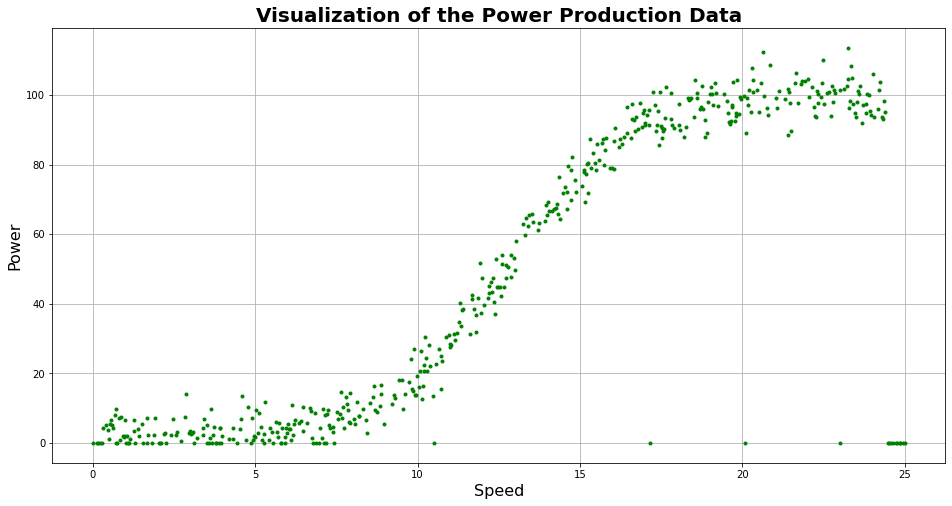

In [6]:
# Sets a plot style 
# Define chart size
plt.figure(figsize=(16,8))
# Add grid lines
plt.grid(True)
# Add title to the chart
plt.title("Visualization of the Power Production Data", fontweight="bold", fontsize=20)
# # Add x lable to the chart
plt.xlabel('Speed', size=16)
# Add y lable to the chart
plt.ylabel('Power', size=16)
# Plot and show data 
plt.plot(df.speed, df.power, '.g')
plt.show()

## Summary and Conclusions<a id="summary"/>

## References<a id="references"/>

1. [R. J. Barthelmie, F. Murray, and S. C. Pryor, “The economic benefit of short-term forecasting for wind energy in the UK electricity market,” Energy Policy, vol. 36, no. 5, pp. 1687–1696, 2008.](https://www.hindawi.com/journals/cin/2020/8439719/#B3)[viewed 4th Dec 2020]
1. [Y.-K. Wu and H. Jing-Shan, A Literature Review of Wind Forecasting Technology in the World, IEEE Lausanne Powertech, Lausanne, Switzerland, 2007.](https://www.hindawi.com/journals/cin/2020/8439719/#B4)[viewed 4th Dec 2020]
1. [Good Energy - Wind Turbines](https://www.goodenergy.co.uk/how-do-wind-turbines-work/)[viewed 4th Dec 2020]
1. [Wikipedia - Wind Power - Floating Point Arithmetic: Issues and Limitations](https://en.wikipedia.org/wiki/Wind_power)[viewed 5th Dec 2020]
1. [Npower - Wind Turbine Power Calculations](https://www.raeng.org.uk/publications/other/23-wind-turbine)[viewed 5th Dec 2020]
1. [NI - Wind Turbine Control Methods](https://www.ni.com/en-ie/innovations/white-papers/08/wind-turbine-control-methods.html)[viewed 5th Dec 2020]
